In [25]:
# Dependencies
import pandas as pd
from pathlib import Path

In [26]:
# Name of the CSV file
obesity_file = Path('Resources/500_Cities__Obesity_among_adults_aged___18_years_20231109.csv')
walk_file = Path('Resources/EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv')
income_file = Path('Resources/kaggle_income.csv')
weather_file = Path('Resources/56_Major_City_Weather_Data.csv')

In [33]:
# The correct encoding must be used to read the CSV in pandas
obesity_df = pd.read_csv(obesity_file, encoding="ISO-8859-1")
walk_df = pd.read_csv(walk_file, encoding="ISO-8859-1")
income_df = pd.read_csv(income_file, encoding="ISO-8859-1")
weather_df = pd.read_csv(weather_file, encoding="ISO-8859-1")

In [28]:
#cleaning and grouping of income by city name
cleaned_income_df = income_df.drop(['id', 'Type', 'Primary', 
                                     'Area_Code','ALand','AWater',
                                     'Lat','Lon','sum_w'], axis=1)
city_income_df = cleaned_income_df.groupby('City', as_index = False)['Mean'].mean()
city_income_df.head()

,City,Mean
0,Abbeville,38459.428571
1,Abbotsford,58254.000000
2,Aberdeen,68306.500000
3,Abilene,51441.866667
4,Abingdon,85714.166667


In [29]:
#cleaning obesity df to make more readable
cleaned_obesity_df = obesity_df.drop(['GeographicLevel', 'DataSource', 'Category', 
                                      'UniqueID','Measure','Data_Value_Unit',
                                      'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol',
                                      'Data_Value_Footnote','CategoryID','MeasureId','Short_Question_Text'], axis=1)

#grouping by city to remove duplicate values (limitation on not doing it by zipcode)
city_obesity_df = cleaned_obesity_df.groupby('CityName', as_index = False)['Data_Value'].mean()
city_obesity_df.head()

,CityName,Data_Value
0,Abilene,33.838462
1,Akron,38.142647
2,Alameda,20.338889
3,Albany,35.403636
4,Albuquerque,26.787050


In [34]:
#cleaning of weather dataframe to remove columns we dont want
weather_df = weather_df[['City','Avg_High_Temp_F','Avg_Low_Temp_F']]
weather_df[['City','State']] = weather_df['City'].str.split(',',expand=True)



weather_df.head()
#df[['V','allele']] = df['V'].str.split('-',expand=True)

,City,Avg_High_Temp_F,Avg_Low_Temp_F,State
0,Atlanta,73,54,Georgia
1,Austin,81,59,Texas
2,Baltimore,67,46,Maryland
3,Birmingham,74,54,Alabama
4,Boston,59,45,Massachusetts


In [38]:
#inner merge of city income and city obesity average %
#formatting to rename column names
inc_merged_df = pd.merge(city_obesity_df, weather_df, left_on='CityName', right_on='City', how='inner')
inc_merged_df = inc_merged_df.drop('City', axis=1)
inc_merged_df = inc_merged_df.rename(columns={"CityName": "City", "Data_Value": "Obesity %", "Mean": 'Average Income'})
inc_merged_df.head()


,City,Obesity %,Average Income
0,Abilene,33.838462,51441.866667
1,Akron,38.142647,53194.675000
2,Alameda,20.338889,89726.375000
3,Albany,35.403636,52808.971429
4,Albuquerque,26.787050,63773.389831


In [47]:
#inner merge of weather and city obesity average %
#formatting to rename column names
wea_merged_df = pd.merge(city_obesity_df, weather_df, left_on='CityName', right_on='City', how='inner')
wea_merged_df = wea_merged_df.drop(['City','State'], axis=1)
wea_merged_df = wea_merged_df.rename(columns={"CityName": "City", "Data_Value": "Obesity %", "Mean": 'Average Income'})
wea_merged_df.head()

,City,Obesity %,Avg_High_Temp_F,Avg_Low_Temp_F
0,Atlanta,31.640152,73,54
1,Austin,25.993000,81,59
2,Baltimore,39.562189,67,46
3,Birmingham,40.329348,74,54
4,Boston,25.387429,59,45


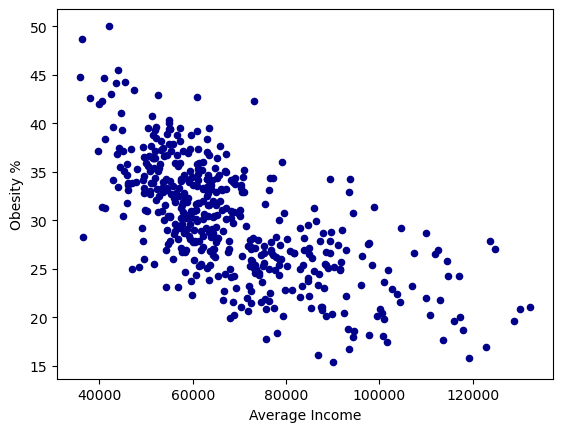

In [48]:
# Quick plot to look at all cities obesity as a function of income
ax1 = inc_merged_df.plot.scatter(x='Average Income',
                      y='Obesity %',
                      c='DarkBlue')

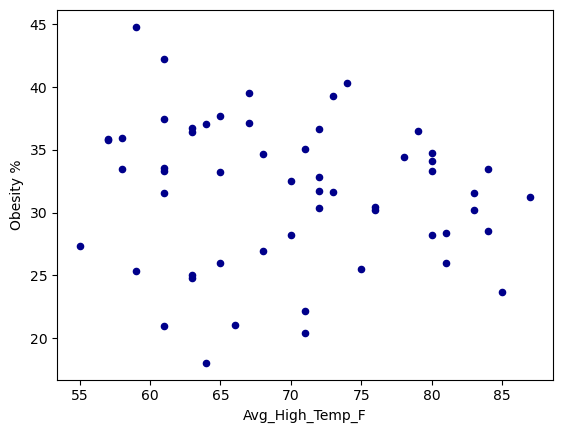

In [50]:
# Quick plot to look at all cities obesity as a function of temperature
ax2 = wea_merged_df.plot.scatter(x='Avg_High_Temp_F',
                      y='Obesity %',
                      c='DarkBlue')

In [ ]:
city_df = pd.read_csv(income_file, encoding="ISO-8859-1")

#cleaning and grouping of income by city name
cleaned_income_df = income_df.drop(['id', 'Type', 'Primary', 
                                     'Area_Code','ALand','AWater',
                                     'Lat','Lon','sum_w'], axis=1)
city_income_df = cleaned_income_df.groupby('City', as_index = False)['Mean'].mean()
city_income_df.head()

In [ ]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]['lat']
        city_lng = weather_json["coord"]['lon']
        city_max_temp = weather_json["main"]['temp_max']
        city_humidity = weather_json["main"]['humidity']
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]['speed']
        city_country = weather_json["sys"]['country']
        city_date = weather_json["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")